<a href="https://colab.research.google.com/github/AlphaStorm-X/AlphaStorm-X/blob/main/Project1_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()

# Rename the default target column (if desired)
df.rename(columns={"MedHouseVal": "price"}, inplace=True)

# Now view the first few rows
print(df.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
# check in the number of rows and columns in the data frame
housing.frame.shape

(20640, 9)

In [ ]:
#check missing values
housing.frame.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
# statistical measure of the dataset
housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation

1. Positive Correlation

2. Negative Correlation

In [ ]:
correlation = housing.frame.corr()

<Axes: >

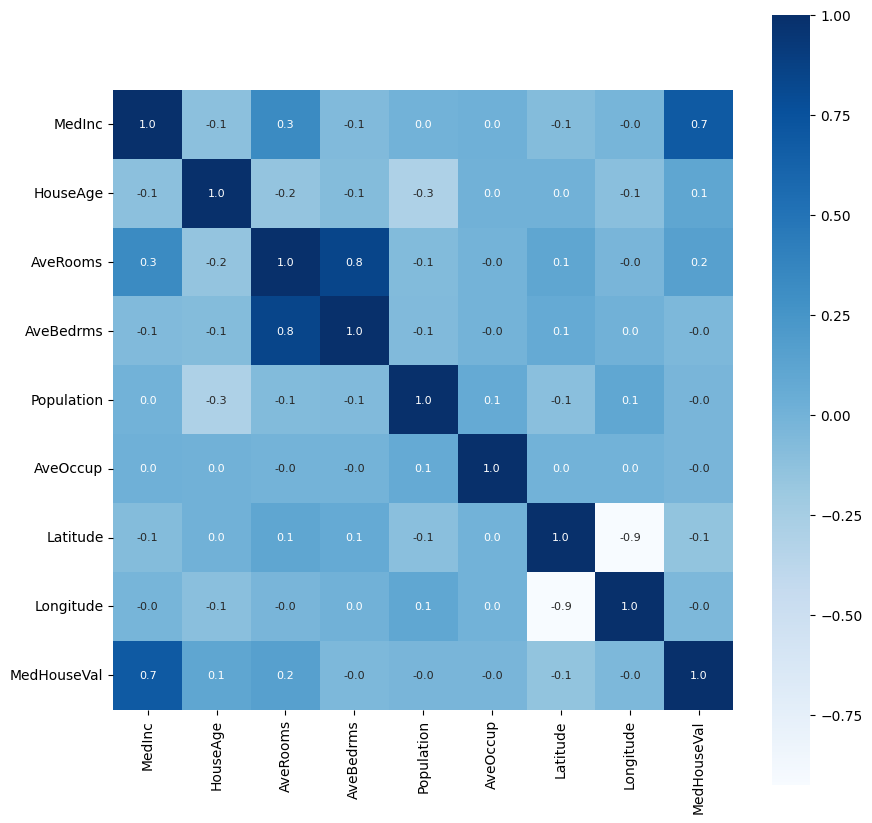

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [36]:
model = XGBRegressor

splitting the data and the target

In [ ]:
X = housing.data
Y = housing.target

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2072,1.4817,6.0,4.443645,1.134293,1397.0,3.350120,36.77,-119.84
10600,6.9133,8.0,5.976471,1.026471,862.0,2.535294,33.68,-117.80
2494,1.5536,25.0,4.088785,1.000000,931.0,4.350467,36.60,-120.19
4284,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
16541,4.0815,21.0,5.166667,1.002688,1130.0,3.037634,37.79,-121.23
...,...,...,...,...,...,...,...,...
1099,3.0625,20.0,5.860000,1.112000,745.0,2.980000,39.59,-121.90
18898,2.6133,49.0,5.163755,1.100437,1131.0,2.469432,38.11,-122.25
11798,4.4958,19.0,5.899767,1.074592,1206.0,2.811189,38.92,-121.22
6637,2.5750,39.0,3.591203,1.086675,2546.0,3.293661,34.16,-118.14


In [38]:
Y_train

,MedHouseVal
2072,0.720
10600,2.741
2494,0.583
4284,2.000
16541,1.179
...,...
1099,0.938
18898,1.031
11798,1.926
6637,1.535


In [43]:
model =XGBRegressor

In [46]:
from xgboost import XGBRegressor

model = XGBRegressor()             # Notice the parentheses
model.fit(X_train, Y_train)       # Now this works correctly


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [51]:
Y_pred = model.predict(X_train)

In [48]:
Y_test_pred = model.predict(X_test)

In [52]:
print("First 5 predictions:", Y_test_pred[:5])

First 5 predictions: [2.8649795  1.790346   0.92074925 4.0887103  3.5433683 ]


In [53]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [55]:
training_data_prediction = model.predict(X_train)

In [56]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [58]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


In [63]:
test_data_prediction = model.predict(X_test)

Prediction on Test Data

In [69]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


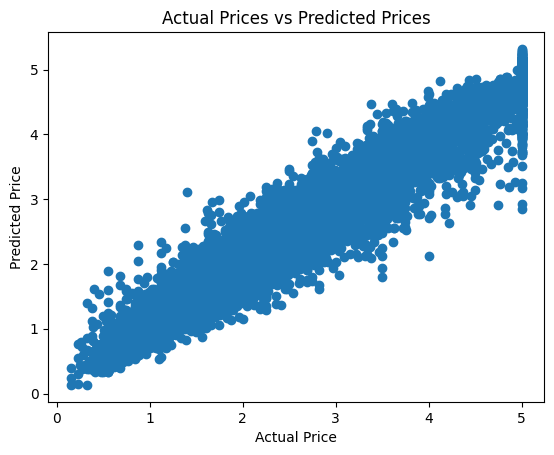

In [62]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

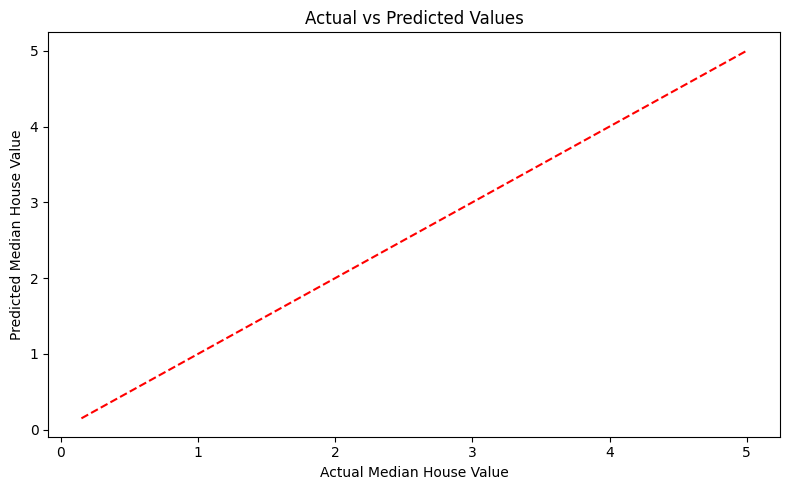

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(X=Y_test, Y=Y_pred, alpha=0.5)

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")

# Optional: Draw a perfect prediction line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.tight_layout()
plt.show()
